In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

### 선형변환 사례

In [13]:
X = np.random.randn(1000,2)

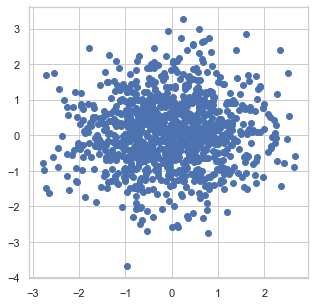

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])

In [65]:
m1 = np.array([[10,0.5],[0.5,0.5]])
Xm1 = X @ m1

In [66]:
Xm1[:2]

array([[-17.25163466,  -1.75036129],
       [-21.37370245,  -1.25908355]])

In [67]:
X[:2]

array([[-1.63171299, -1.86900959],
       [-2.11732831, -0.40083879]])

In [68]:
m1

array([[10. ,  0.5],
       [ 0.5,  0.5]])

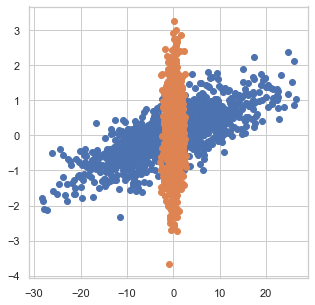

In [70]:
plt.figure(figsize=(5,5))
plt.scatter(Xm1[:, 0], Xm1[:, 1])
plt.scatter(X[:, 0], X[:, 1])

### 공분산 행렬 구하는 법

In [133]:
X = np.array([[170, 70], [150, 45], [160, 55], [180, 60], [172, 80]])
X

array([[170,  70],
       [150,  45],
       [160,  55],
       [180,  60],
       [172,  80]])

In [134]:
D = np.hstack(((X[:,0]-np.mean(X[:, 0])).reshape(-1, 1), (X[:,1] - np.mean(X[:, 1])).reshape(-1, 1)))
D

array([[  3.6,   8. ],
       [-16.4, -17. ],
       [ -6.4,  -7. ],
       [ 13.6,  -2. ],
       [  5.6,  18. ]])

In [93]:
D.T @ D

array([[539.2, 426. ],
       [426. , 730. ]])

* 위에서 1,1 은 X의 편차 제곱합, 1,2는 X와 Y의 편차의 제곱합이다.
* 위 식을 n으로 나누면 각각의 분산값이 된다는 걸 알 수 있다. 

In [96]:
(D.T @ D) / 5

array([[107.84,  85.2 ],
       [ 85.2 , 146.  ]])

### PCA 진행해보기

* https://excelsior-cjh.tistory.com/167
* https://angeloyeo.github.io/2019/07/27/PCA.html
* https://rfriend.tistory.com/181 (고유벡터, 고유값)

* 분산을 최대한으로 보존하는 단위벡터(축)를 찾는 것이 PCA의 목적이다.
* i 번째 축을 정의하는 단위벡터를 i번째 주성분이라고 한다.

In [97]:
### 임시 데이터 만들기

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [98]:
### 데이터의 공분산 행렬 구하기 

X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


* 위에서 공분산은 왜 구하는 것일까?
* 사실 공분산을 구해야 하는 이유는 
    1. 우리가 원래 데이터에 단위 벡터 $e$에 정사영한다고 하자
    2. 그리고, 정사연한 이후에 PCA의 목적대로 분산을 최대화해야 한다고 하자.
    3. 그렇다면 우리는 여기서 원래 데이터 $X$에 단위벡터 $e$를 내적한 값에 대한 분산이 최대화 되는 $e$를 찾는 문제가 된다.
    4. 위의 문제를 해결하는 데서 공분산이 나오게 된다. 
    5. 위 문제는 라그랑주 방정식으로 진행되는 데 자세한 사항은 아래 그림 참조

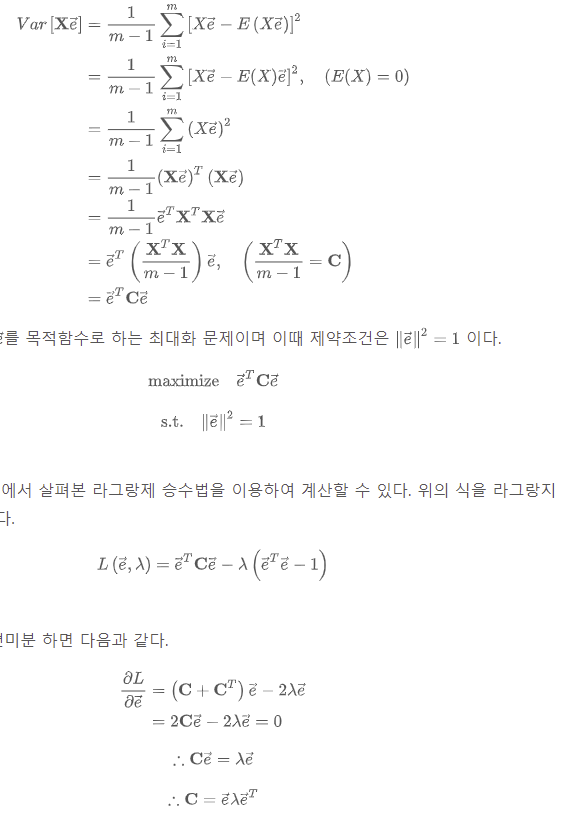

* 결국, 위 증명을 보면 분산을 최대화하는 $e$는 $C$의 고유벡터임을 알 수 있다. $\lambda$는 고유값임을 알 수 있다.

In [99]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector :
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [143]:
for i in range(3) :
    print(f'{i}번째 단위벡터 내적: {v[:, i].T @ v[:, i]}')

0번째 단위벡터 내적: 1.0000000000000002
1번째 단위벡터 내적: 1.0
2번째 단위벡터 내적: 1.0000000000000002


* 고유벡터는 단위벡터이므로 당연한 결과다
* 위와 같은 단위(고유)벡터를 이제 원래 데이터에 대해 내적(선형 변환)하면
* 선형 변환된 벡터가 나오게 되고 해당 벡터의 분산은 제일 최대의 분산이다.

In [120]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [128]:
(X_cen @ v)[:5]

array([[-1.26203346,  0.42067648,  0.0138445 ],
       [ 0.08001485, -0.35272239, -0.15436525],
       [-1.17545763,  0.36085729, -0.00722714],
       [-0.89305601, -0.30862856,  0.03418723],
       [-0.73016287, -0.25404049,  0.19736924]])

In [121]:
pca.fit_transform(X)[:5]

array([[ 1.26203346,  0.42067648,  0.0138445 ],
       [-0.08001485, -0.35272239, -0.15436525],
       [ 1.17545763,  0.36085729, -0.00722714],
       [ 0.89305601, -0.30862856,  0.03418723],
       [ 0.73016287, -0.25404049,  0.19736924]])

* 위 결과를 보면 PCA를 통해 나온 결과와 동일함을 볼 수 있다